In [76]:
import numpy as np
import torch
import torchvision
import torch.nn as nn
import torch.nn.functional as F
import matplotlib.pyplot as plt

print(torch.cuda.is_available())
print(torch.backends.mps.is_available())
print(torch.backends.mps.is_built())
device = torch.device("mps")

batch_size_train = 64
batch_size_test = 1000
epochs = 5
train = True

train_loader = torch.utils.data.DataLoader(
    torchvision.datasets.MNIST(
        "files/",
        train=True,
        download=True,
        transform=torchvision.transforms.Compose(
            [
                torchvision.transforms.ToTensor(),
                torchvision.transforms.Normalize((0.1307,), (0.3081,)),
            ]
        ),
    ),
    batch_size=batch_size_train,
    shuffle=True,
)

test_loader = torch.utils.data.DataLoader(
    torchvision.datasets.MNIST(
        "files/",
        train=False,
        download=True,
        transform=torchvision.transforms.Compose(
            [
                torchvision.transforms.ToTensor(),
                torchvision.transforms.Normalize((0.1307,), (0.3081,)),
            ]
        ),
    ),
    batch_size=batch_size_test,
    shuffle=True,
)

False
True
True


In [77]:
class Model(torch.nn.Module):
    def __init__(self):
        super().__init__()
        self.conv1 = nn.Conv2d(1, 10, kernel_size=5)
        self.conv2 = nn.Conv2d(10, 20, kernel_size=5)
        self.conv2_drop = nn.Dropout2d()
        self.fc1 = nn.Linear(320, 50)
        self.fc2 = nn.Linear(50, 10)


    def forward(self, x):
        x = F.relu(F.max_pool2d(self.conv1(x), 2))
        x = F.relu(F.max_pool2d(self.conv2_drop(self.conv2(x)), 2))
        x = x.view(-1, 320)
        x = F.relu(self.fc1(x))
        x = F.dropout(x, training=self.training)
        x = self.fc2(x)
        return F.log_softmax(x)


model = Model()
optimizer = torch.optim.SGD(model.parameters(), lr=0.01, momentum=0.5)
print(model)

Model(
  (conv1): Conv2d(1, 10, kernel_size=(5, 5), stride=(1, 1))
  (conv2): Conv2d(10, 20, kernel_size=(5, 5), stride=(1, 1))
  (conv2_drop): Dropout2d(p=0.5, inplace=False)
  (fc1): Linear(in_features=320, out_features=50, bias=True)
  (fc2): Linear(in_features=50, out_features=10, bias=True)
)


In [78]:
loss_values = []
test_loss_values = []

def test():
    test_loss = 0
    correct = 0

    model.eval()
    with torch.no_grad():
        for data, target in test_loader:
            prediction = model(data)
            test_loss += F.nll_loss(prediction, target, reduction="sum").item()
            pred = prediction.argmax(dim=1, keepdim=True)
            correct += pred.eq(target.view_as(pred)).sum().item()

    test_loss /= len(test_loader.dataset)
    test_loss_values.append(test_loss)
    print(f"\nTest set: Average loss: {test_loss:.4f}, Accuracy: {correct}/{len(test_loader.dataset)} ({100. * correct / len(test_loader.dataset):.0f}%)\n")


def train():
    for n in range(epochs):
        model.train()
        for batch, (data, target) in enumerate(train_loader):
            if not train:
                continue

            optimizer.zero_grad()
            prediction = model(data)

            loss = F.nll_loss(prediction, target)
            loss_values.append(loss.item())
            loss.backward()
            optimizer.step()

            if batch % 1000 == 0:
                print(
                    f"Train Epoch: {n} [{batch * len(data)}/{len(train_loader.dataset)} ({100. * batch / len(train_loader):.0f}%)]\tLoss: {loss.item()}"
                )
        test()


test()
train()

/var/folders/s0/xcg0d2_s6tg_2v3r53qlxyl40000gn/T/ipykernel_17983/2239903289.py:18: UserWarning: Implicit dimension choice for log_softmax has been deprecated. Change the call to include dim=X as an argument.
  return F.log_softmax(x)



Test set: Average loss: 2.3082, Accuracy: 1047/10000 (10%)

Train Epoch: 0 [0/60000 (0%)]	Loss: 2.323012351989746

Test set: Average loss: 0.1954, Accuracy: 9418/10000 (94%)

Train Epoch: 1 [0/60000 (0%)]	Loss: 0.5508386492729187

Test set: Average loss: 0.1225, Accuracy: 9624/10000 (96%)

Train Epoch: 2 [0/60000 (0%)]	Loss: 0.35211119055747986

Test set: Average loss: 0.1011, Accuracy: 9696/10000 (97%)

Train Epoch: 3 [0/60000 (0%)]	Loss: 0.3221321105957031

Test set: Average loss: 0.0824, Accuracy: 9731/10000 (97%)

Train Epoch: 4 [0/60000 (0%)]	Loss: 0.17978951334953308

Test set: Average loss: 0.0725, Accuracy: 9774/10000 (98%)



[2.323012351989746, 2.3424973487854004, 2.334449052810669, 2.321977138519287, 2.295480728149414, 2.309999704360962, 2.3066463470458984, 2.3029863834381104, 2.279945135116577, 2.298250198364258, 2.3152318000793457, 2.3231325149536133, 2.2913472652435303, 2.3281750679016113, 2.3275792598724365, 2.3139407634735107, 2.3100855350494385, 2.2847516536712646, 2.314030170440674, 2.2878258228302, 2.2939951419830322, 2.2696034908294678, 2.2967851161956787, 2.311657428741455, 2.2453930377960205, 2.2879302501678467, 2.28190279006958, 2.290682315826416, 2.3085389137268066, 2.26636004447937, 2.275988817214966, 2.2831614017486572, 2.2613351345062256, 2.251218795776367, 2.265192985534668, 2.267016887664795, 2.280292272567749, 2.2884132862091064, 2.2706027030944824, 2.305939197540283, 2.2526071071624756, 2.234670877456665, 2.2636048793792725, 2.2692413330078125, 2.277275323867798, 2.2562918663024902, 2.2563016414642334, 2.2600786685943604, 2.270528793334961, 2.2374582290649414, 2.2636513710021973, 2.265

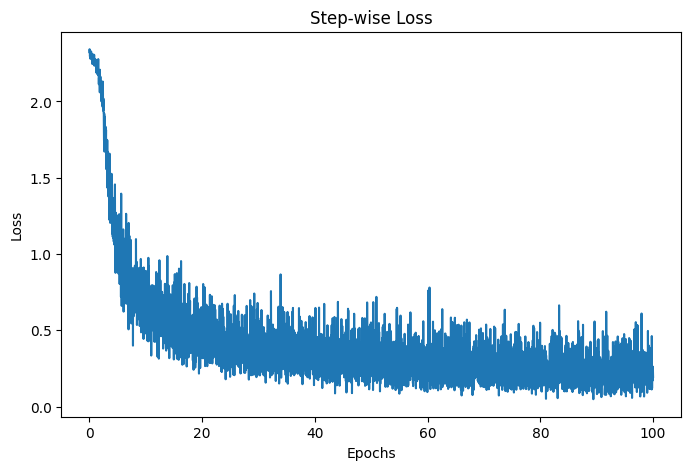

[2.308216162109375, 0.19544715423583983, 0.12247106094360352, 0.10105558700561523, 0.08238572006225586, 0.07252431259155273]


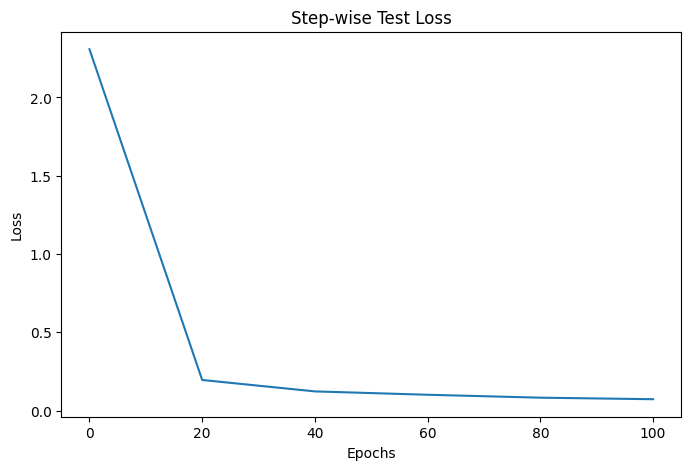

In [79]:
step = np.linspace(0, 100, len(loss_values))
fig, ax = plt.subplots(figsize=(8,5))
plt.plot(step, np.array(loss_values))
plt.title("Step-wise Loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.show()

step = np.linspace(0, 100, len(test_loss_values))
fig, ax = plt.subplots(figsize=(8,5))
plt.plot(step, np.array(test_loss_values))
plt.title("Step-wise Test Loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.show()